<a href="https://colab.research.google.com/github/technophille/technophille/blob/main/antelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ANTELLIGENCE/data/Dataset.xlsx'
data=pd.read_excel(file_path)

Mounted at /content/drive


In [26]:
import requests

URL = "https://antelligence-proto-default-rtdb.firebaseio.com/antelligence/live.json"

response = requests.get(URL)
print("Raw Firebase response:")
print(response.text)

live_data = response.json()
live_data


Raw Firebase response:
{"earthquake":false,"steps_last_minute":31,"timestamp":431312,"total_steps_today":31}


{'earthquake': False,
 'steps_last_minute': 31,
 'timestamp': 431312,
 'total_steps_today': 31}

In [27]:
import numpy as np

df['cow_sum_mean'] = df['steps_last_minute']
df['dog_sum_mean'] = df['cow_sum_mean'] * np.random.uniform(0.8, 1.1)
df['sheep_sum_mean'] = df['cow_sum_mean'] * np.random.uniform(0.6, 1.0)

df[['cow_sum_mean','dog_sum_mean','sheep_sum_mean']]



,cow_sum_mean,dog_sum_mean,sheep_sum_mean
0,31,29.925649,21.580422


In [28]:
rows = []
for key, value in firebase_data.items():
    rows.append(value)

firebase_df = pd.DataFrame(rows)
firebase_df.head()


,0
0,False
1,31
2,431312
3,31


In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [30]:
eqdata=data
eqdata.describe()

,ODBAsum_mean,cow_sum_mean,dog_sum_mean,sheep_sum_mean,Magnitude,EQ
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,164629.222406,84451.217880,38266.409128,96024.556158,4.575181,0.201158
std,77733.830280,53214.150446,38290.216045,103920.565795,0.565736,0.401011
min,42860.900000,9453.500000,9126.975000,15346.885714,3.300000,0.000000
25%,105994.821429,49976.142857,13124.011607,36313.435714,4.200000,0.000000
50%,140609.110714,66786.637500,24636.150000,51952.960714,4.500000,0.000000
75%,217440.787500,107088.300000,47007.704464,100030.690179,4.900000,0.000000
max,622702.457143,361590.000000,395125.550000,681138.300000,7.700000,1.000000


In [31]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(eqdata, test_size=0.2)

In [32]:
# Creating the dataframes for training and test datasets
train_eqdata = trainingSet
test_eqdata = testSet

In [33]:
X_train = train_eqdata[['cow_sum_mean','dog_sum_mean','sheep_sum_mean']]

y_train = train_eqdata["EQ"]

X_test = test_eqdata[['cow_sum_mean','dog_sum_mean','sheep_sum_mean']]

y_test = test_eqdata["EQ"]


In [45]:
alert_payload = {
    "alert": "EARTHQUAKE DETECTED",
    "confidence": float(probability),
    "timestamp": int(live_data["timestamp"])
}

requests.put(
    "https://antelligence-proto-default-rtdb.firebaseio.com/antelligence/alerts/latest.json",
    json=alert_payload
)


<Response [200]>

In [46]:
#Model prediction
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [48]:
import kagglehub
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")

100%|██████████| 15.8k/15.8k [00:00<00:00, 10.7MB/s]

Extracting files...


In [49]:
import kagglehub
path = kagglehub.dataset_download("usgs/earthquake-database")

100%|██████████| 590k/590k [00:00<00:00, 965kB/s]

Extracting files...


In [47]:
#Evaluating using confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[211,  10],
       [ 48,   8]])

In [21]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7942238267148014


In [34]:
live_df = pd.DataFrame([live_data])


In [36]:
live_df = pd.DataFrame([live_data])
live_df['cow_sum_mean'] = live_df['steps_last_minute']
live_df['dog_sum_mean'] = live_df['cow_sum_mean'] * np.random.uniform(0.8, 1.1)
live_df['sheep_sum_mean'] = live_df['cow_sum_mean'] * np.random.uniform(0.6, 1.0)
X_live = live_df[['cow_sum_mean','dog_sum_mean','sheep_sum_mean']]



In [37]:
X_live


,cow_sum_mean,dog_sum_mean,sheep_sum_mean
0,31,29.673088,28.921087


In [38]:
prediction = logreg.predict(X_live)[0]
probability = logreg.predict_proba(X_live)[0][1]

print("Prediction:", "EARTHQUAKE" if prediction == 1 else "NORMAL")
print("Probability:", round(probability * 100, 2), "%")


Prediction: NORMAL
Probability: 14.02 %


In [39]:
if probability > 0.7:
    print(" HIGH EARTHQUAKE RISK — Animal unrest detected")
elif probability > 0.4:
    print(" MODERATE unrest — monitor closely")
else:
    print("Normal behavior")


✅ Normal behavior


Text(0.5, 427.9555555555555, 'Predicted label')

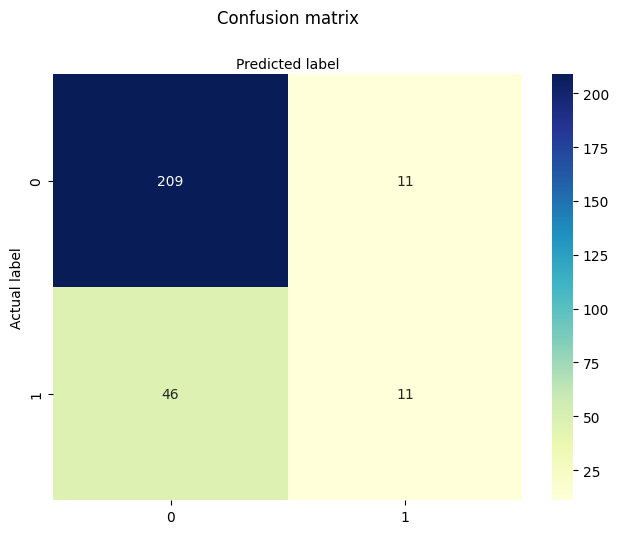

In [40]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7617328519855595
Precision: 0.2727272727272727
Recall: 0.10714285714285714


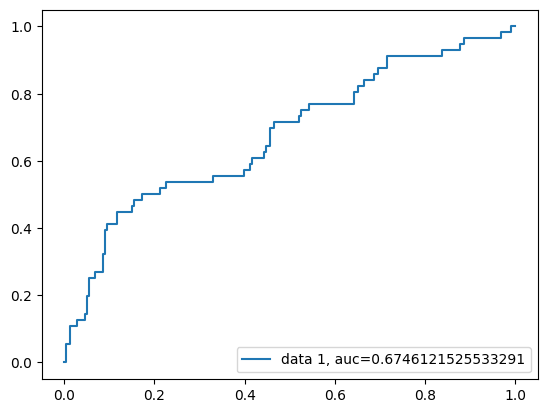

In [42]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

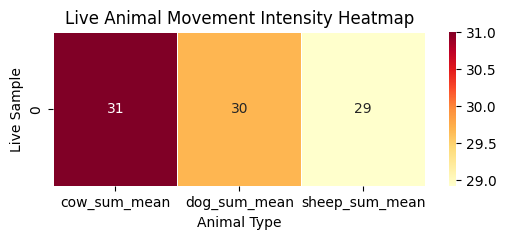

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 2))

sns.heatmap(
    X_live,
    annot=True,
    cmap="YlOrRd",
    cbar=True,
    linewidths=0.5
)

plt.title("Live Animal Movement Intensity Heatmap")
plt.xlabel("Animal Type")
plt.ylabel("Live Sample")

plt.show()
